In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv(r"train_final.csv").drop(columns=['id'])

print(f'train set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')

train.head()

train set은 23 개의 feature를 가진 2999 개의 데이터 샘플로 이루어져 있습니다.


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Male,Loyal Customer,72,Business travel,Business,1784,1,1,4,1,...,2,2,3,2,5,2,0,0,0,1
1,Male,Loyal Customer,35,Business travel,Business,2228,2,5,5,5,...,2,2,2,2,4,2,0,0,8,0
2,Male,disloyal Customer,37,Business travel,Eco,1970,4,3,4,1,...,1,3,2,5,1,4,0,1,2,1
3,Female,Loyal Customer,20,Personal Travel,Eco,2249,5,5,1,3,...,1,4,1,4,1,5,0,0,0,1
4,Male,disloyal Customer,38,Business travel,Eco,1995,2,2,2,2,...,5,2,5,3,1,2,0,110,102,0


In [2]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values

    return summary

resumetable(train)

데이터 세트 형상: (2999, 23)


,피처,데이터 타입,결측값 개수,고윳값 개수
0,Gender,object,0,2
1,Customer Type,object,0,2
2,Age,int64,0,73
3,Type of Travel,object,0,2
4,Class,object,0,3
5,Flight Distance,int64,0,2003
6,Seat comfort,int64,0,6
7,Departure/Arrival time convenient,int64,0,6
8,Food and drink,int64,0,6
9,Gate location,int64,0,5


# EDA

## 결측치 확인

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


## 분포 확인

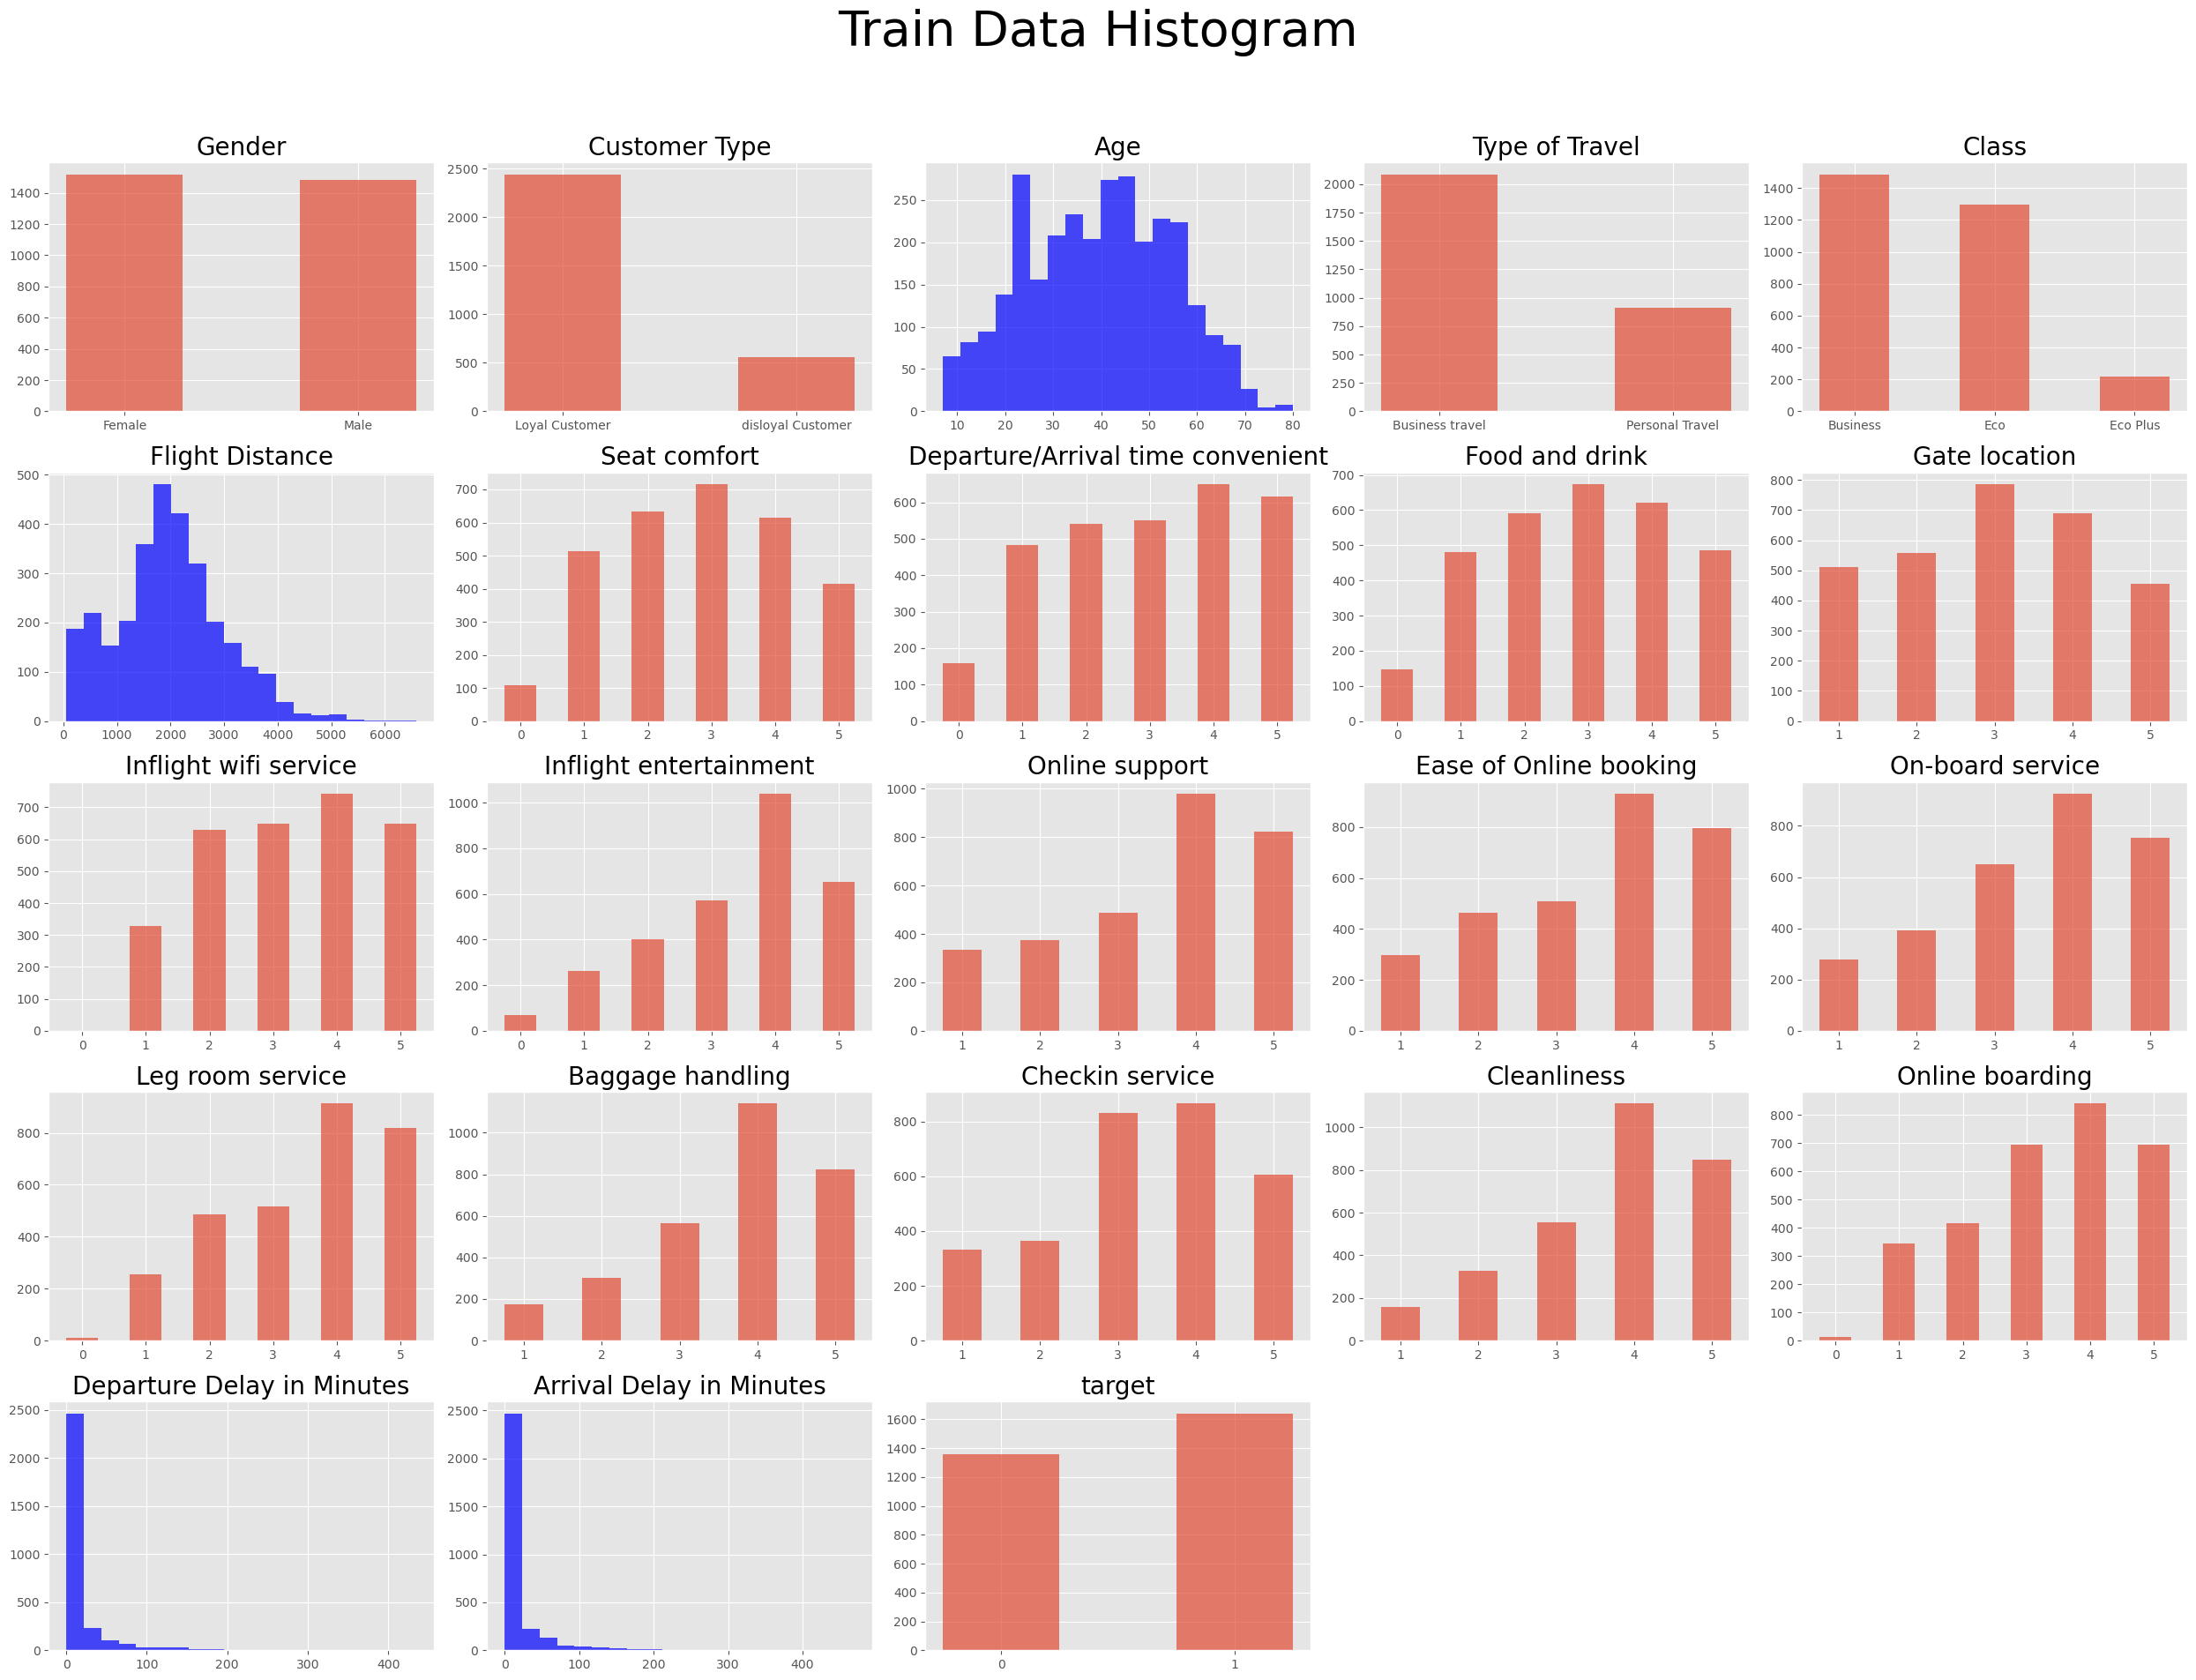

In [4]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Train Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 바이올린 플롯 확인

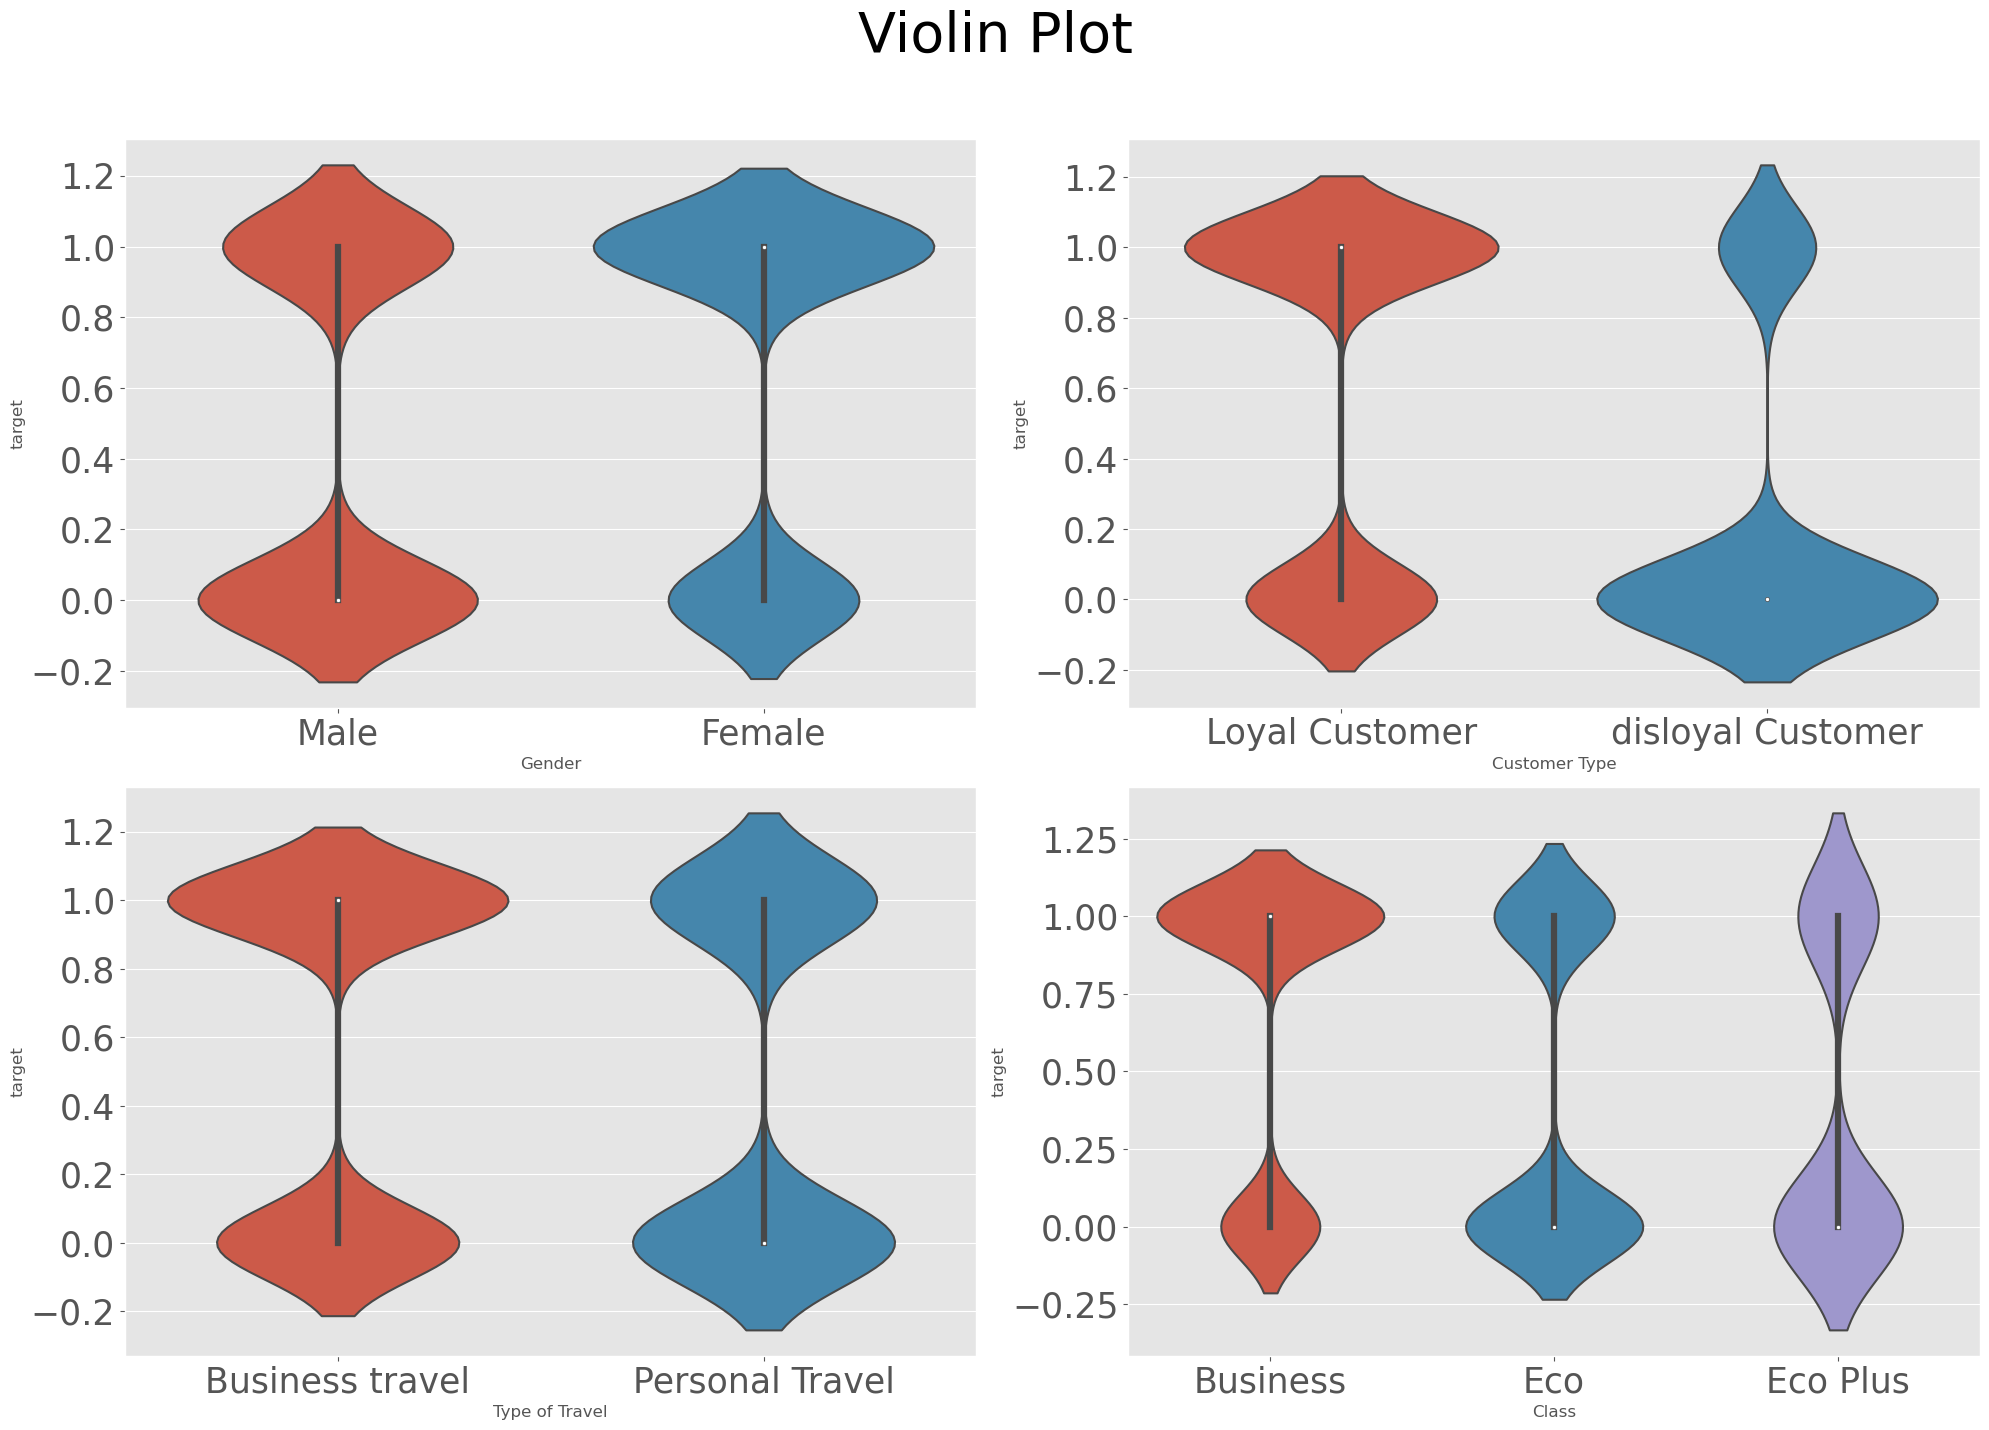

In [5]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = train.columns[train.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= train[categorical_feature[i]], y=train[target])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

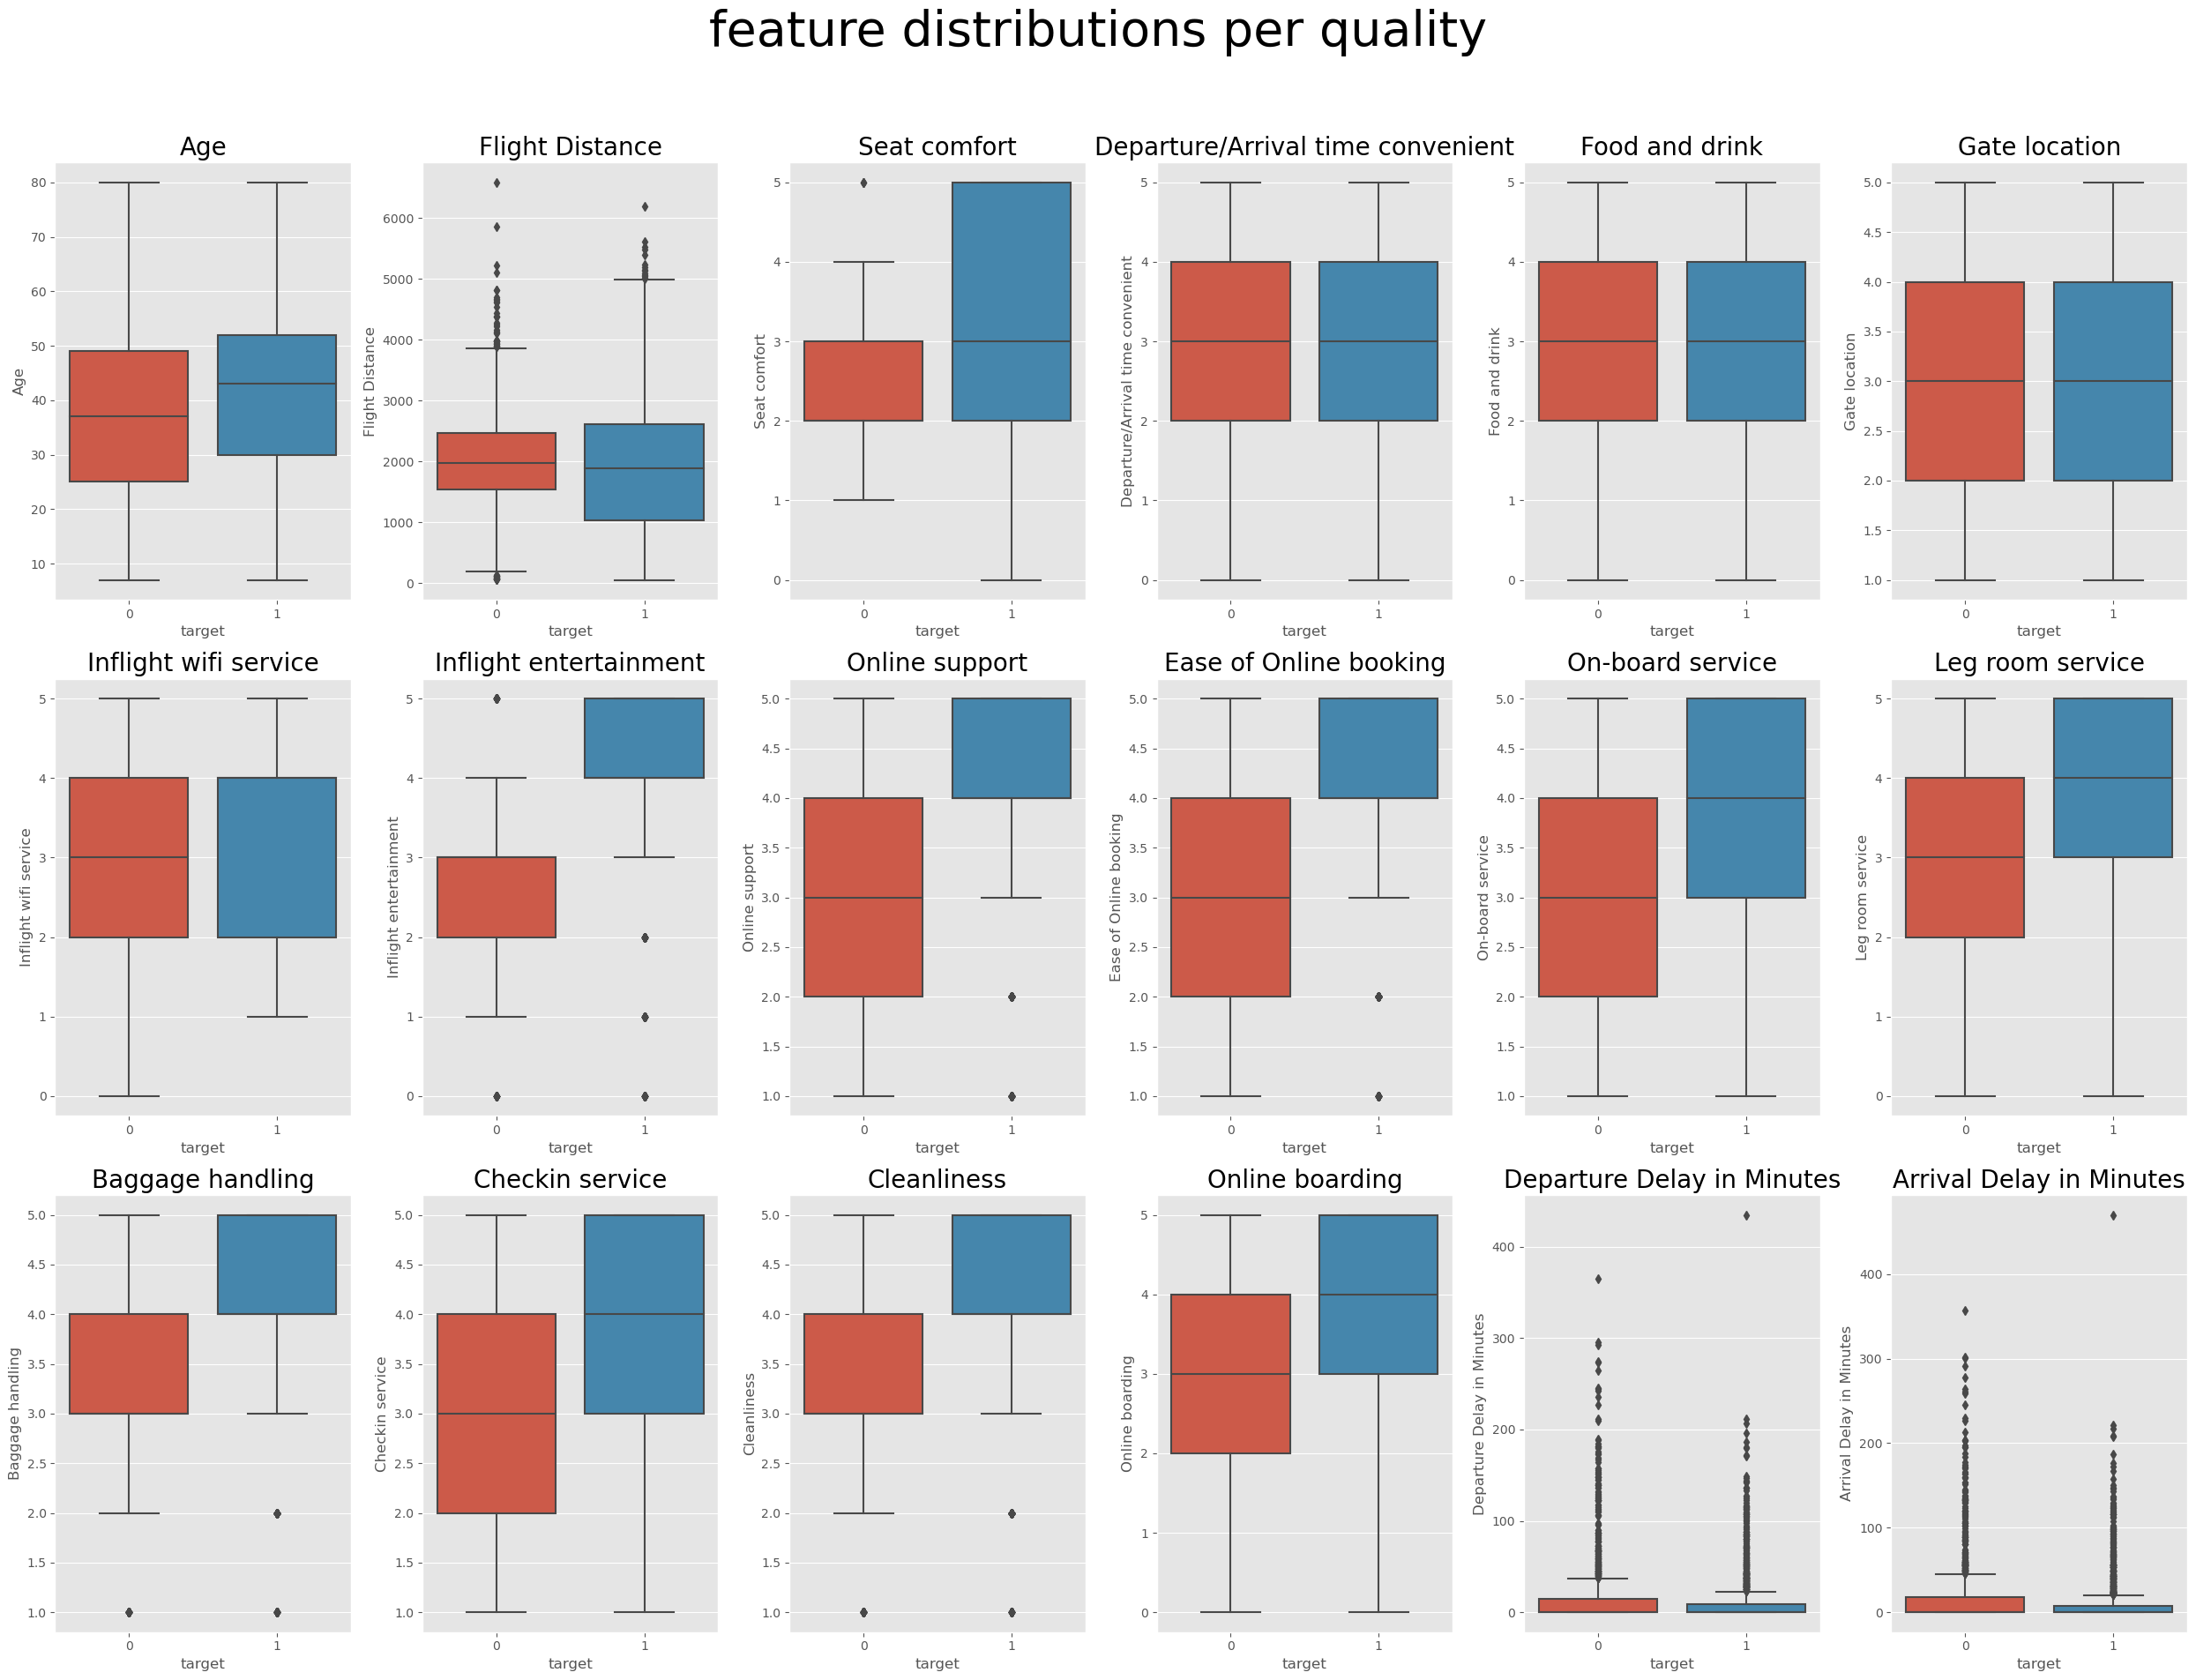

In [6]:
# 수치형 데이터 분리
numeric_feature = train.columns[(train.dtypes=='int64') | (train.dtypes=='float')]
num_data = train[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [7]:
# # 모든 열 이상치 제거
# # columns = train.select_dtypes(include=['int64', 'float64']).columns

# # Flight Distance 제외한 열 이상치 제거
# # columns = train[['Age', 'Seat comfort', 'Inflight entertainment',
# #        'Online support', 'Ease of Online booking', 'On-board service',
# #        'Leg room service', 'Baggage handling', 'Checkin service',
# #        'Cleanliness', 'Online boarding']]

# # 상관관계 0.3 이상인 열 이상치 제거
# columns = train[['Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Online boarding']]


# def remove_outliers(df, columns):
#     for column in columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
#         df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#     return df

# train_cleaned = remove_outliers(train, columns)

# train = train_cleaned.reset_index(drop=True)
# train

## 전처리

In [8]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()): #enumerate는 인덱스와 함께 고유값 반환, enumerate(['a', 'b', 'c'])는 (0, 'a'), (1, 'b'), (2, 'c')와 같은 튜플을 반환
                label_map[key] = i+1  
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) 
    return dataframe

# train 데이터 라벨 인코딩
train_label_map = make_label_map(train) # train 사용해 label map 생성
train = label_encoder(train, train_label_map) # train 라벨 인코딩

train.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
1340,1,1,24,1,1,3079,2,2,2,2,...,5,4,5,4,3,4,5,0,9,1
2437,1,1,42,1,1,2510,3,3,3,3,...,4,4,4,4,3,4,5,27,44,1
1160,1,1,61,2,2,1254,1,4,0,3,...,2,3,5,4,5,5,2,0,0,0
1543,1,2,21,1,1,1684,5,0,5,1,...,2,5,4,5,3,4,2,0,0,1
1385,2,1,24,1,2,1583,0,3,0,4,...,5,2,1,4,2,4,5,0,16,1
1076,1,1,38,2,1,472,4,4,4,2,...,4,4,4,4,4,4,5,46,47,0
2524,2,2,36,1,3,1882,2,3,3,4,...,1,1,4,4,4,4,1,12,14,0
2238,2,1,25,1,1,1963,5,5,5,5,...,3,3,3,5,5,1,3,17,10,1
2882,1,1,32,1,1,3673,3,5,5,5,...,3,3,3,3,1,4,3,0,0,0
915,1,2,23,1,1,1950,5,5,5,2,...,3,3,5,5,4,4,3,0,0,1


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train['Flight Distance'] = scaler.fit_transform(train[['Flight Distance']])
train['Age'] = scaler.fit_transform(train[['Age']])
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,1,0.890411,1,1,0.264656,1,1,4,1,...,2,2,3,2,5,2,0,0,0,1
1,1,1,0.383562,1,1,0.332619,2,5,5,5,...,2,2,2,2,4,2,0,0,8,0
2,1,2,0.410959,1,2,0.293127,4,3,4,1,...,1,3,2,5,1,4,0,1,2,1
3,2,1,0.178082,2,2,0.335833,5,5,1,3,...,1,4,1,4,1,5,0,0,0,1
4,1,2,0.424658,1,2,0.296954,2,2,2,2,...,5,2,5,3,1,2,0,110,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,2,1,0.424658,2,2,0.310730,3,3,3,3,...,2,2,2,2,4,2,1,0,2,1
2995,1,1,0.698630,1,1,0.085566,1,1,1,1,...,1,1,1,1,3,1,3,13,8,0
2996,1,1,0.479452,1,1,0.329405,4,5,5,5,...,4,4,4,4,3,4,4,0,20,0
2997,1,1,0.534247,2,2,0.219042,3,4,3,3,...,1,4,4,3,3,4,1,0,0,0


# 모델링

In [10]:
# Logistic Regression 
# Decision Tree
# Support Vector Machine
# Random Forest
# Neural Network
# lightGBM
# XGBoost

In [11]:
# %pip install lightgbm
# %pip install xgboost

### 다양한 이진분류 모델 돌려보기
- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forest
- LightGBM
- XGBoost
- Neural Network

이 모델들을 전부 돌려본 결과 Random Forest, LightGBM, XGBoost가 가장 좋은 성능을 보임

C:\Users\selffish234\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\selffish234\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

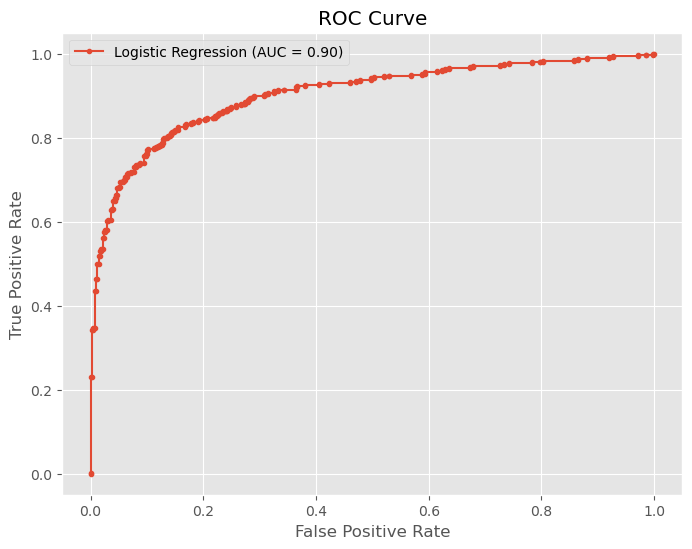

Logistic Regression Accuracy Score: 0.8366075808249722
Logistic Regression - AUC: 0.90
Logistic Regression - Confusion Matrix:
[[343  77]
 [ 78 402]]


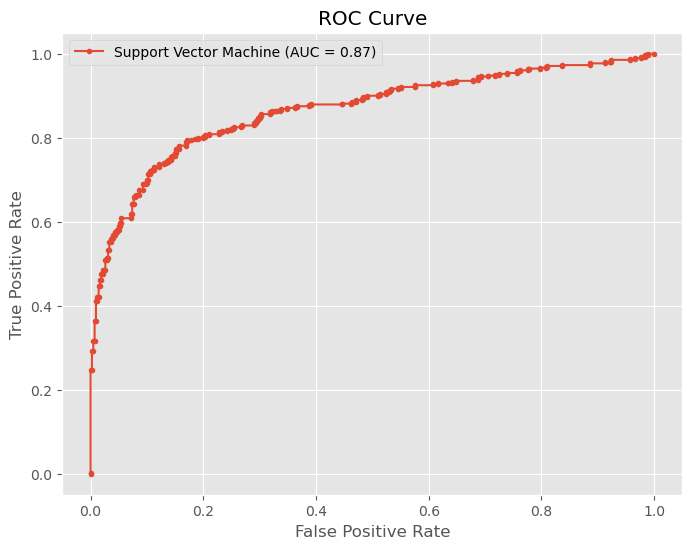

Support Vector Machine Accuracy Score: 0.8149253065774804
Support Vector Machine - AUC: 0.87
Support Vector Machine - Confusion Matrix:
[[332  88]
 [ 92 388]]


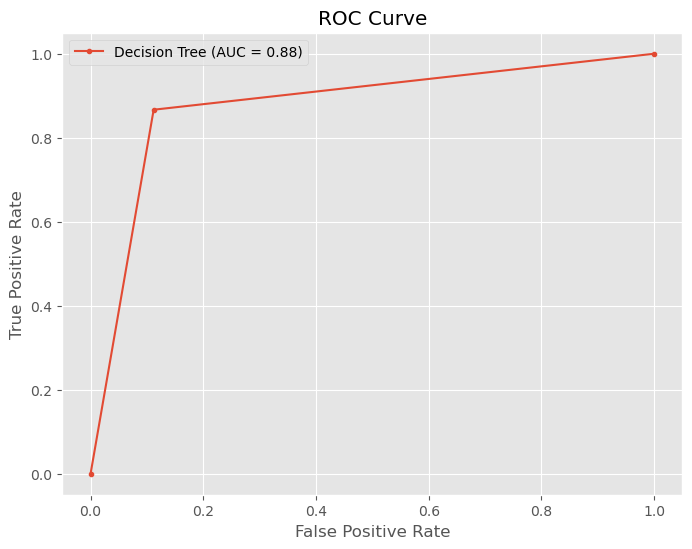

Decision Tree Accuracy Score: 0.8866187290969899
Decision Tree - AUC: 0.88
Decision Tree - Confusion Matrix:
[[373  47]
 [ 64 416]]


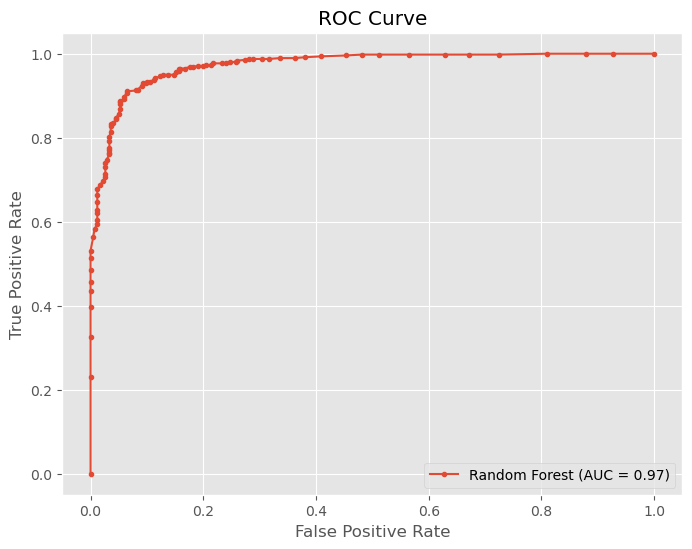

Random Forest Accuracy Score: 0.9256309921962096
Random Forest - AUC: 0.97
Random Forest - Confusion Matrix:
[[382  38]
 [ 37 443]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1162, number of negative: 937
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 621
[LightGBM] [Info] Number of data points in the train set: 2099, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553597 -> initscore=0.215215
[LightGBM] [Info] Start training from score 0.215215
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1477, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.

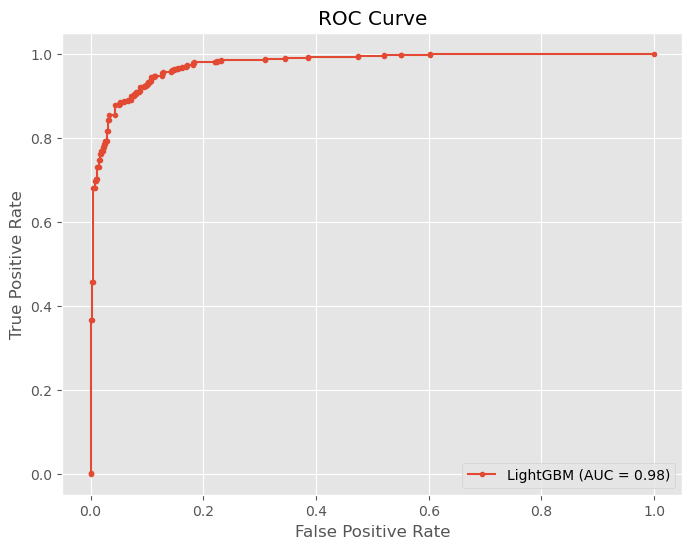

LightGBM Accuracy Score: 0.9336399108138238
LightGBM - AUC: 0.98
LightGBM - Confusion Matrix:
[[388  32]
 [ 48 432]]


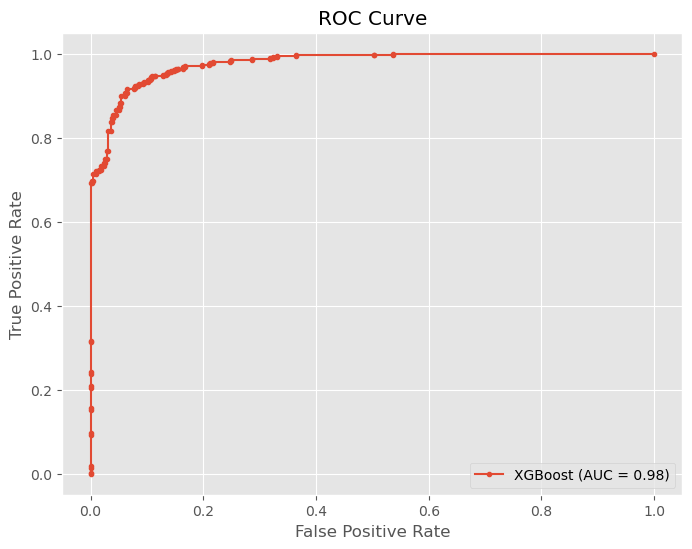

XGBoost Accuracy Score: 0.9339777034559642
XGBoost - AUC: 0.98
XGBoost - Confusion Matrix:
[[390  30]
 [ 40 440]]


C:\Users\selffish234\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\selffish234\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\selffish234\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\selffish234\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\selffish234\anaconda3\Lib\site-packages

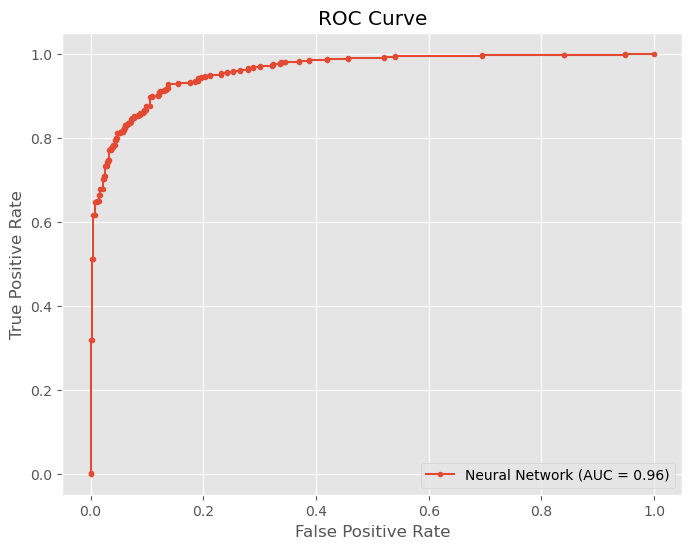

Neural Network Accuracy Score: 0.8946187290969899
Neural Network - AUC: 0.96
Neural Network - Confusion Matrix:
[[363  57]
 [ 39 441]]


In [12]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

X = train.drop(columns=['target'])
y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier()
}

scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    # score = accuracy_score(y_test, y_preds)
    score = cross_val_score(model, X, y, cv=10)

    conf_matrix = confusion_matrix(y_test, y_preds)

    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    print(f'{name} Accuracy Score: {score.mean()}')
    print(f'{name} - AUC: {roc_auc:.2f}')
    print(f'{name} - Confusion Matrix:\n{conf_matrix}')

## 중요한 feature 가중치 + top_n(중요한 상위 16개 열)만 사용하여 모델 학습
전처리에서
- feature 제거 x
- 이상치 제거 x

하이퍼파라미터
- train test 7: 3
- 사용한 열: 중요도가 높은 순서대로 16개 <- 16개를 사용할 때 가장 정확도가 높음
- cross validation: 10회

<br>

lightGBM: (클래스 불균형 해소를 위한)클래스 가중치 적용 시 더 높은 성능 <br>
- 클래스 가중치를 적용하면 accuracy score는 높지만 False positive 비율 높음
- 클래스 가중치를 적용하지 않으면 accuracy score는 낮지만 False positive 비율 낮음


XGBoost: 클래스 가중치 미적용 시 더 높은 성능


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1324, number of negative: 1075
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:25:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1324, number of negative: 1075
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 598
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1477, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Numb

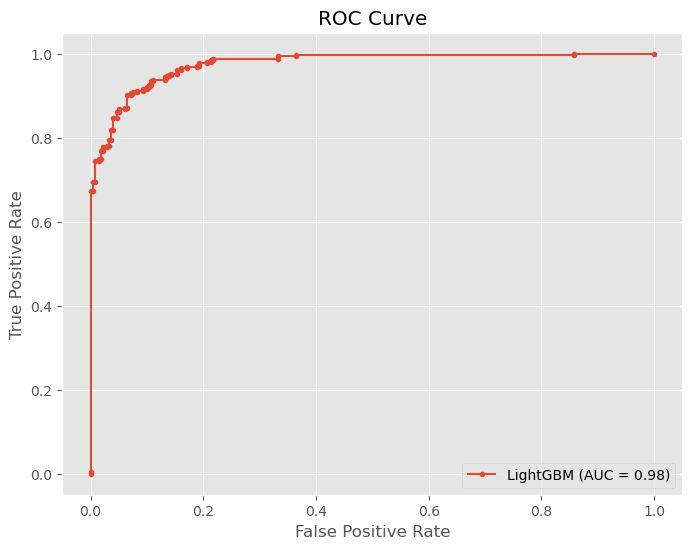

LightGBM Accuracy Score: 0.9296399108138239
LightGBM - AUC: 0.98
LightGBM - Confusion Matrix:
[[264  18]
 [ 32 286]]
LightGBM - Precision: 0.9408
LightGBM - Recall: 0.8994


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:25:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\selffish234\anac

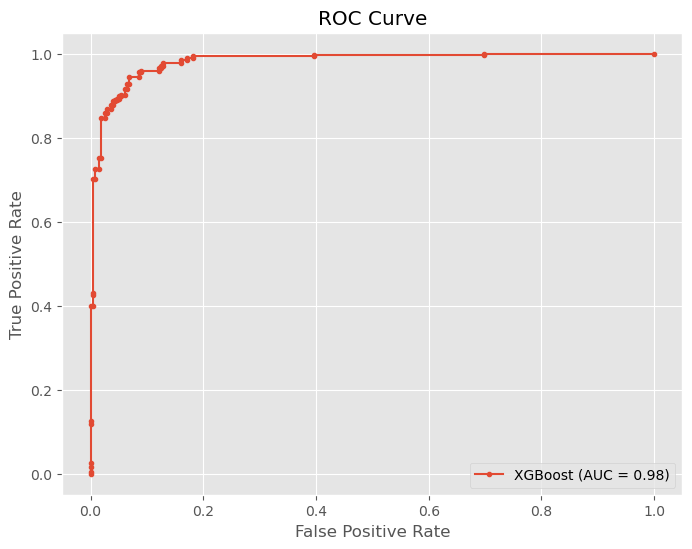

XGBoost Accuracy Score: 0.9346410256410257
XGBoost - AUC: 0.98
XGBoost - Confusion Matrix:
[[265  17]
 [ 27 291]]
XGBoost - Precision: 0.9448
XGBoost - Recall: 0.9151


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import lightgbm as lgb
from xgboost import XGBClassifier
import pandas as pd

# Data preparation
X = train.drop(columns=['target'])
y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weight ratio
weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initial models to calculate feature importance
init_models = {
    'LightGBM': lgb.LGBMClassifier(class_weight={0: 1, 1: weight_ratio}),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

feature_importances = {}
for name, model in init_models.items():
    model.fit(X_train, y_train)
    feature_importances[name] = pd.Series(model.feature_importances_, index=X_train.columns)

# Select top features based on importance
top_features = {}
top_n = 16  # For example, select top 16 features
for name, importances in feature_importances.items():
    top_features[name] = importances.nlargest(top_n).index.tolist()

# Train models using selected top features
scores = {}
for name, model in init_models.items():
    selected_features = top_features[name]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    model.fit(X_train_selected, y_train)
    y_preds = model.predict(X_test_selected)
    score = cross_val_score(model, X[selected_features], y, cv=10)
    # score = accuracy_score(y_test, y_preds)
    conf_matrix = confusion_matrix(y_test, y_preds)
    y_probs = model.predict_proba(X_test_selected)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    # ROC Curve plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    print(f'{name} Accuracy Score: {score.mean()}')
    print(f'{name} - AUC: {roc_auc:.2f}')
    print(f'{name} - Confusion Matrix:\n{conf_matrix}')
    print(f'{name} - Precision: {precision_score(y_test, y_preds):.4f}')
    print(f'{name} - Recall: {recall_score(y_test, y_preds):.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1324, number of negative: 1075
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1324, number of negative: 1075
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1477, number of negative: 1222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495297 -> initscore=-0.018813
[LightGBM] [Info] Start training from score -0.018813


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1477, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495297 -> initscore=-0.018813
[LightGBM] [Info] Start training from score -0.018813


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 2700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495466 -> initscore=-0.018136
[LightGBM] [Info] Start training from score -0.018136


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:57:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


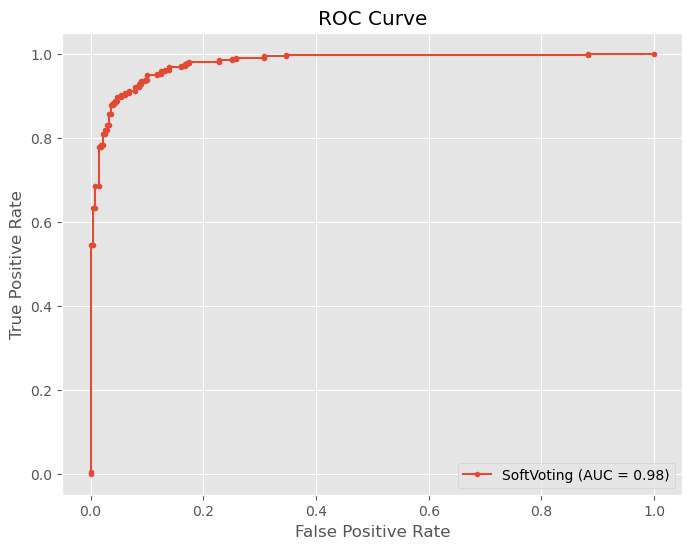

SoftVoting Accuracy Score: 0.9349754738015609
SoftVoting - AUC: 0.98
SoftVoting - Confusion Matrix:
[[260  22]
 [ 27 291]]
SoftVoting - Precision: 0.9297
SoftVoting - Recall: 0.9151


In [17]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import lightgbm as lgb
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

# Data preparation
X = train.drop(columns=['target'])
y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weight ratio
weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(class_weight={0: 1, 1: weight_ratio}),
    'LightGBM': lgb.LGBMClassifier(class_weight={0: 1, 1: weight_ratio}),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Calculate feature importances
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    feature_importances[name] = pd.Series(model.feature_importances_, index=X_train.columns)

# Select top features based on importance
top_features = {}
top_n = 22  # For example, select top 16 features
for name, importances in feature_importances.items():
    top_features[name] = importances.nlargest(top_n).index.tolist()

# Train models using selected top features and combine with VotingClassifier
voting_models = {
    'SoftVoting': VotingClassifier(estimators=[
        ('rf', models['RandomForest']),
        ('lgb', models['LightGBM']),
        ('xgb', models['XGBoost'])
    ], voting='soft')
}

for voting_name, voting_model in voting_models.items():
    selected_features = set()
    for name in models.keys():
        selected_features.update(top_features[name])
    
    selected_features = list(selected_features)
    
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    voting_model.fit(X_train_selected, y_train)
    y_preds = voting_model.predict(X_test_selected)
    score = cross_val_score(voting_model, X[selected_features], y, cv=10)
    conf_matrix = confusion_matrix(y_test, y_preds)
    y_probs = voting_model.predict_proba(X_test_selected)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    # ROC Curve plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f'{voting_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    
    print(f'{voting_name} Accuracy Score: {score.mean()}')
    print(f'{voting_name} - AUC: {roc_auc:.2f}')
    print(f'{voting_name} - Confusion Matrix:\n{conf_matrix}')
    print(f'{voting_name} - Precision: {precision_score(y_test, y_preds):.4f}')
    print(f'{voting_name} - Recall: {recall_score(y_test, y_preds):.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1324, number of negative: 1075
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1324, number of negative: 1075
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 632
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1477, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495297 -> initscore=-0.018813
[LightGBM] [Info] Start training from score -0.018813


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1477, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495297 -> initscore=-0.018813
[LightGBM] [Info] Start training from score -0.018813


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 642
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 643
[LightGBM] [Info] Number of data points in the train set: 2699, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495671 -> initscore=-0.017317
[LightGBM] [Info] Start training from score -0.017317


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1478, number of negative: 1222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 2700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495466 -> initscore=-0.018136
[LightGBM] [Info] Start training from score -0.018136


C:\Users\selffish234\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:00:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


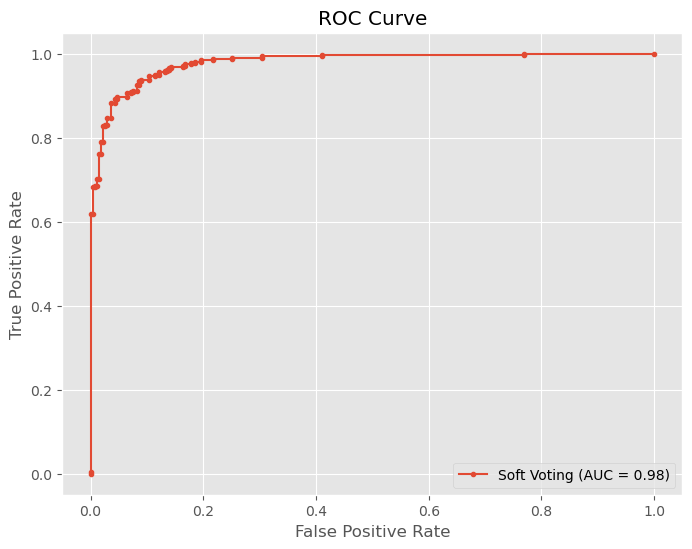

Soft Voting Accuracy Score: 0.9333054626532886
Soft Voting - AUC: 0.98
Soft Voting - Confusion Matrix:
[[260  22]
 [ 28 290]]
Soft Voting - Precision: 0.9295
Soft Voting - Recall: 0.9119


In [19]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import lightgbm as lgb
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

# Data preparation
X = train.drop(columns=['target'])
y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weight ratio
weight_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize models with class weights
models = {
    'RandomForest': RandomForestClassifier(class_weight={0: 1, 1: weight_ratio}),
    'LightGBM': lgb.LGBMClassifier(class_weight={0: 1, 1: weight_ratio}),
    'XGBoost': XGBClassifier(scale_pos_weight=weight_ratio, use_label_encoder=False, eval_metric='logloss')
}

# Calculate feature importances
feature_importances = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    feature_importances[name] = pd.Series(model.feature_importances_, index=X_train.columns)

# Select top features based on importance
top_features = {}
top_n = 22  # For example, select top 16 features
for name, importances in feature_importances.items():
    top_features[name] = importances.nlargest(top_n).index.tolist()

# Train models using selected top features and combine with Soft Voting Classifier
selected_features = set()
for name in models.keys():
    selected_features.update(top_features[name])

selected_features = list(selected_features)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

voting_model = VotingClassifier(estimators=[
    ('rf', models['RandomForest']),
    ('lgb', models['LightGBM']),
    ('xgb', models['XGBoost'])
], voting='soft')

voting_model.fit(X_train_selected, y_train)
y_preds = voting_model.predict(X_test_selected)
score = cross_val_score(voting_model, X[selected_features], y, cv=10)
conf_matrix = confusion_matrix(y_test, y_preds)
y_probs = voting_model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# ROC Curve plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'Soft Voting (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(f'Soft Voting Accuracy Score: {score.mean()}')
print(f'Soft Voting - AUC: {roc_auc:.2f}')
print(f'Soft Voting - Confusion Matrix:\n{conf_matrix}')
print(f'Soft Voting - Precision: {precision_score(y_test, y_preds):.4f}')
print(f'Soft Voting - Recall: {recall_score(y_test, y_preds):.4f}')


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score